In [15]:
%matplotlib inline

*(Note: `%matplotlib widget` allows for fancier interactivity in plots than `%matplot inline`, see [github repo](https://github.com/matplotlib/jupyter-matplotlib), if you want to play with that.*

# 592B-F21, Class 3.1 (09/14). Reading in WAV files and plotting them, intro to Fourier series

## Miscellaneous tips
To comment a region of code, highlight it and press: 
- PCs: `Ctrl` + `/`
- Macs: `Cmd` + `/`

---

## Review Questions

Let's get some practice with reading and writing WAV files in python. We'll be working with a sample audio file called `hmong_m6_24_c.wav` in the `rms-sample-sounds` sub-directory in this repository. This is an audio file I recorded from a native speaker of White Hmong in Fresno, California some years ago.

We'll be using functions from `scipy.io.wavefile`:
- [*scipy.io.wavefile.read*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#scipy.io.wavfile.read) reads in a WAV file as a NumPy array (and also returns the sampling rate).
- [*scipy.io.wavefile.write*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.write.html) writes a NumPy array as a WAV file, given a sampling rate and a filename. 
You'll play with this in your homework for this week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io.wavfile as wavfile 

# As far as I know, scipy.io.wavfile only can handle mono files, and not stereo ones. 
# The "wave" library can handle stereo

help(wavfile.read) # uncomment to look at help file for scipy.io.wavfile


Help on function read in module scipy.io.wavfile:

read(filename, mmap=False)
    Open a WAV file.
    
    Return the sample rate (in samples/sec) and data from an LPCM WAV file.
    
    Parameters
    ----------
    filename : string or open file handle
        Input WAV file.
    mmap : bool, optional
        Whether to read data as memory-mapped (default: False).  Not compatible
        with some bit depths; see Notes.  Only to be used on real files.
    
        .. versionadded:: 0.12.0
    
    Returns
    -------
    rate : int
        Sample rate of WAV file.
    data : numpy array
        Data read from WAV file. Data-type is determined from the file;
        see Notes.  Data is 1-D for 1-channel WAV, or 2-D of shape
        (Nsamples, Nchannels) otherwise. If a file-like input without a
        C-like file descriptor (e.g., :class:`python:io.BytesIO`) is
        passed, this will not be writeable.
    
    Notes
    -----
    Common data types: [1]_
    
    ================

Let's read-in a WAV file using `scipy.io.wavfile.read`.

***RQ 1. Read in the Hmong wave file called `hmong_m6_24_c.wav` in the `rms-sample-sounds` sub-directory and write to an array `hmong_data`. What is the sampling rate for this audio file?*** 

What kind of data type is `hmong_data`? Let's check!

In [ ]:
type(hmong_data)

It's an [n-dimensional NumPy array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html). If you go to the documentation page, you can see what `ndarray`'s [attributes](http://greenteapress.com/thinkpython2/html/thinkpython2016.html#sec179) are. 

In [6]:
print(hmong_data.dtype) # data type
print(hmong_data.ndim) # number of dimensions
print(hmong_data.size) # number of elements in array

int16
1
35015


So, `hmong_data` is a 1-D NumPy array with 35015 elements, which are of [data type](https://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) `int16`. 

The data type `int16` stands for "integer (-32768 to 32767)".

***RQ2: `16` in `int16` stands for 16-bit. Does that fit with the number of amplitude values contained in the range (-32768 to 32767)? Work this out in the cell below.*** 

***RQ3: What is the range of values in `hmong_data`? Based on this range, what range do you think the waveform would have in Praat and why?***

Now that we've read in `hmong_m6_24_c.wav`, we can also use our `IPython.display.Audio` command from Class 1.2 to play the sound.

In [12]:
from IPython.display import Audio

Audio(data=hmong_data, rate=fs)

But we might also like to do more with the audio data than just listen to it! And we can do more, since it's been read in as a NumPy array.

***End Review Questions***

------------------------------------------------------

## Plotting an audio file waveform

First, let's plot the first $n$ samples of the audio signal. Here let $n=4096$ samples. (What's going on at the beginning of the audio file---why is it flat?) 



Text(0.5, 1.0, 'Hmong wave file')

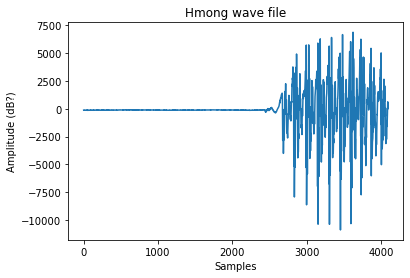

In [16]:
#https://stackoverflow.com/a/25095962

n = 4096 # number of samples to plot

# Set up a new figure
plt.figure("hmong")

# plot the first n samples
plt.plot(hmong_data[0:n])
# label the axes
plt.ylabel("Amplitude (dB?)")
plt.xlabel("Samples")
# set the title  
plt.title("Hmong wave file")


You might be wondering what units the amplitude is in. Remember, these are digitized signals, so this is dependent on the bit depth of the recording--and you already know what that is from `hmong_data.dtype`. In your homework for next week, you'll familiarize yourself with **standardizing** or **normalizing** the amplitude, e.g., into the range -1 to 1, like you see in Praat's display of the waveform. 

You might have also noticed a problem with the x-axis: that's not really time on the x-axis is it? That's the sample number! 

So we really should re-label the x-axis as in samples, not in time. Can you make that change?


We can also convert from samples to time on the x-axis, e.g., in seconds.

***In-class exercise: Plot the first second of the Hmong audio file, with a real time axis, i.e., time should be in seconds, not in samples. Hint: knowing the sampling rate will help you do this! I put a cell below for you to get started.***

***And if you finish that, can you also write a function that will plot the audio file from some start time `t_start` to some stop time `t_stop`?***

In your next homework, you'll also get practice **resampling** the audio using [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html) (and maybe 'by hand'!) and writing it to a WAV file.

---


## Sine waves and cosine waves

Let's review the relation between sine and cosine waves. Let's plot a sine wave and a cosine wave:

$$y_{sin} = A \sin(440\pi t)$$
$$y_{cos} = A \cos(440\pi t)$$

In [17]:
fs = 44100 # define the sampling rate, f_s = 144100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  3 # We stop sampling at t = 3s

ns = (t_stop - t_start) * fs + 1
print(ns)

x = np.linspace(t_start, t_stop, ns)
print(len(x))

f = 440 # frequency of y_sin


y_sin = np.sin(2*np.pi*f*x) #do we need x1 and x2, or common x okay
y_cos = np.cos(2*np.pi*f*x)

132301
132301


Text(0, 0.5, 'Amplitude (dB)')

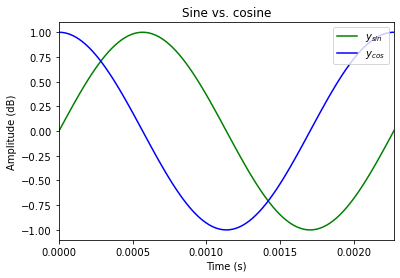

In [18]:
plt.figure("Sine vs. cosine")
plt.title("Sine vs. cosine")
plt.xlim(0,1/f) # What is 1/f?

plt.plot(x,y_sin, 'g', label='$y_{sin}$')
plt.plot(x,y_cos, 'b', label='$y_{cos}$')

plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')


***In-class exercise: how could I get the blue line plotted by only modifying the parameters of $y_{sin}(t)$?***

## Adding up sine waves: towards Fourier series

Let's take the two sinusoidal signals you've been working on in your homework and try adding them up.


In [24]:
fs = 44100 # define the sampling rate, f_s = 100 Hz

t_start = 0 # We start sampling at t = 0s
t_stop =  10 # We stop sampling at t = 10s

ns = (t_stop - t_start) * fs + 1

x = np.linspace(t_start, t_stop, ns)


f1 = 440 # frequency of y_1(t)
f2 = 220 # frequency of y_2(t)

y1 = np.sin(2*np.pi*f1*x)
y2 = np.sin(2*np.pi*f2*x)

y1_plus_y2 = y1+y2


Text(0, 0.5, 'Amplitude (dB)')

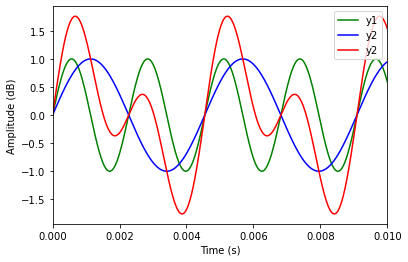

In [20]:
plt.figure("Adding up sines") # Create a new figure

plt.xlim(0,0.01)
plt.plot(x , y1, "-g", label="y1") # plot (x,y1) as a green line
plt.plot(x , y2, "-b", label="y2") # plot (x,y2) as a blue line
plt.plot(x , y1_plus_y2, "-r", label="y2") # plot (x,y2) as a blue line


#plt.stem(x,y1, 'r', )
plt.legend(loc="upper right") 
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

You should play with setting other parameters! Remember, you can listen to your generated sinusoids too, using `Audio`.

